<a href="https://colab.research.google.com/github/kakuteki/Calculator/blob/master/dogcat_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [1]:
!pip install icrawler

  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=18431e6a8cbd9de84bb0d0a64f9e489ac8ce5ce73a8a5a9665a683e415de1b34
  Stored in directory: /root/.cache/pip/wheels/57/f7/08/e89027083863374b83f7b3e3ce52a9afa1674424a379c7faf9
Successfully built icrawler


In [ ]:
from icrawler.builtin import BingImageCrawler

# 猫の画像を100枚取得
crawler = BingImageCrawler(storage={"root_dir": "cat"})
crawler.crawl(keyword="猫", max_num=100)

2021-03-17 13:25:50,253 - INFO - icrawler.crawler - start crawling...
2021-03-17 13:25:50,254 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-03-17 13:25:50,258 - INFO - feeder - thread feeder-001 exit
2021-03-17 13:25:50,262 - INFO - icrawler.crawler - starting 1 parser threads...
2021-03-17 13:25:50,268 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-03-17 13:25:50,552 - INFO - parser - parsing result page https://www.bing.com/images/async?q=猫&first=0
2021-03-17 13:25:50,967 - INFO - downloader - image #1	https://pic1.zhimg.com/v2-4eab28f79bd70bdfeb82c0ce49d175c6_r.jpg
2021-03-17 13:25:54,912 - INFO - downloader - image #2	https://img.zcool.cn/community/01aa135d2b373ba80120b5abbca161.jpg
2021-03-17 13:25:56,022 - INFO - downloader - image #3	https://img.zcool.cn/community/01eafb5d2b3736a8012148379339e3.jpg
2021-03-17 13:25:57,101 - INFO - downloader - image #4	https://img.zcool.cn/community/016f405d2b3735a80120b5ab031177.jpg
2021-03-17 13:25:58,275 - I

In [ ]:
from icrawler.builtin import BingImageCrawler

# 猫の画像を100枚取得
crawler = BingImageCrawler(storage={"root_dir": "dog"})
crawler.crawl(keyword="犬", max_num=100)

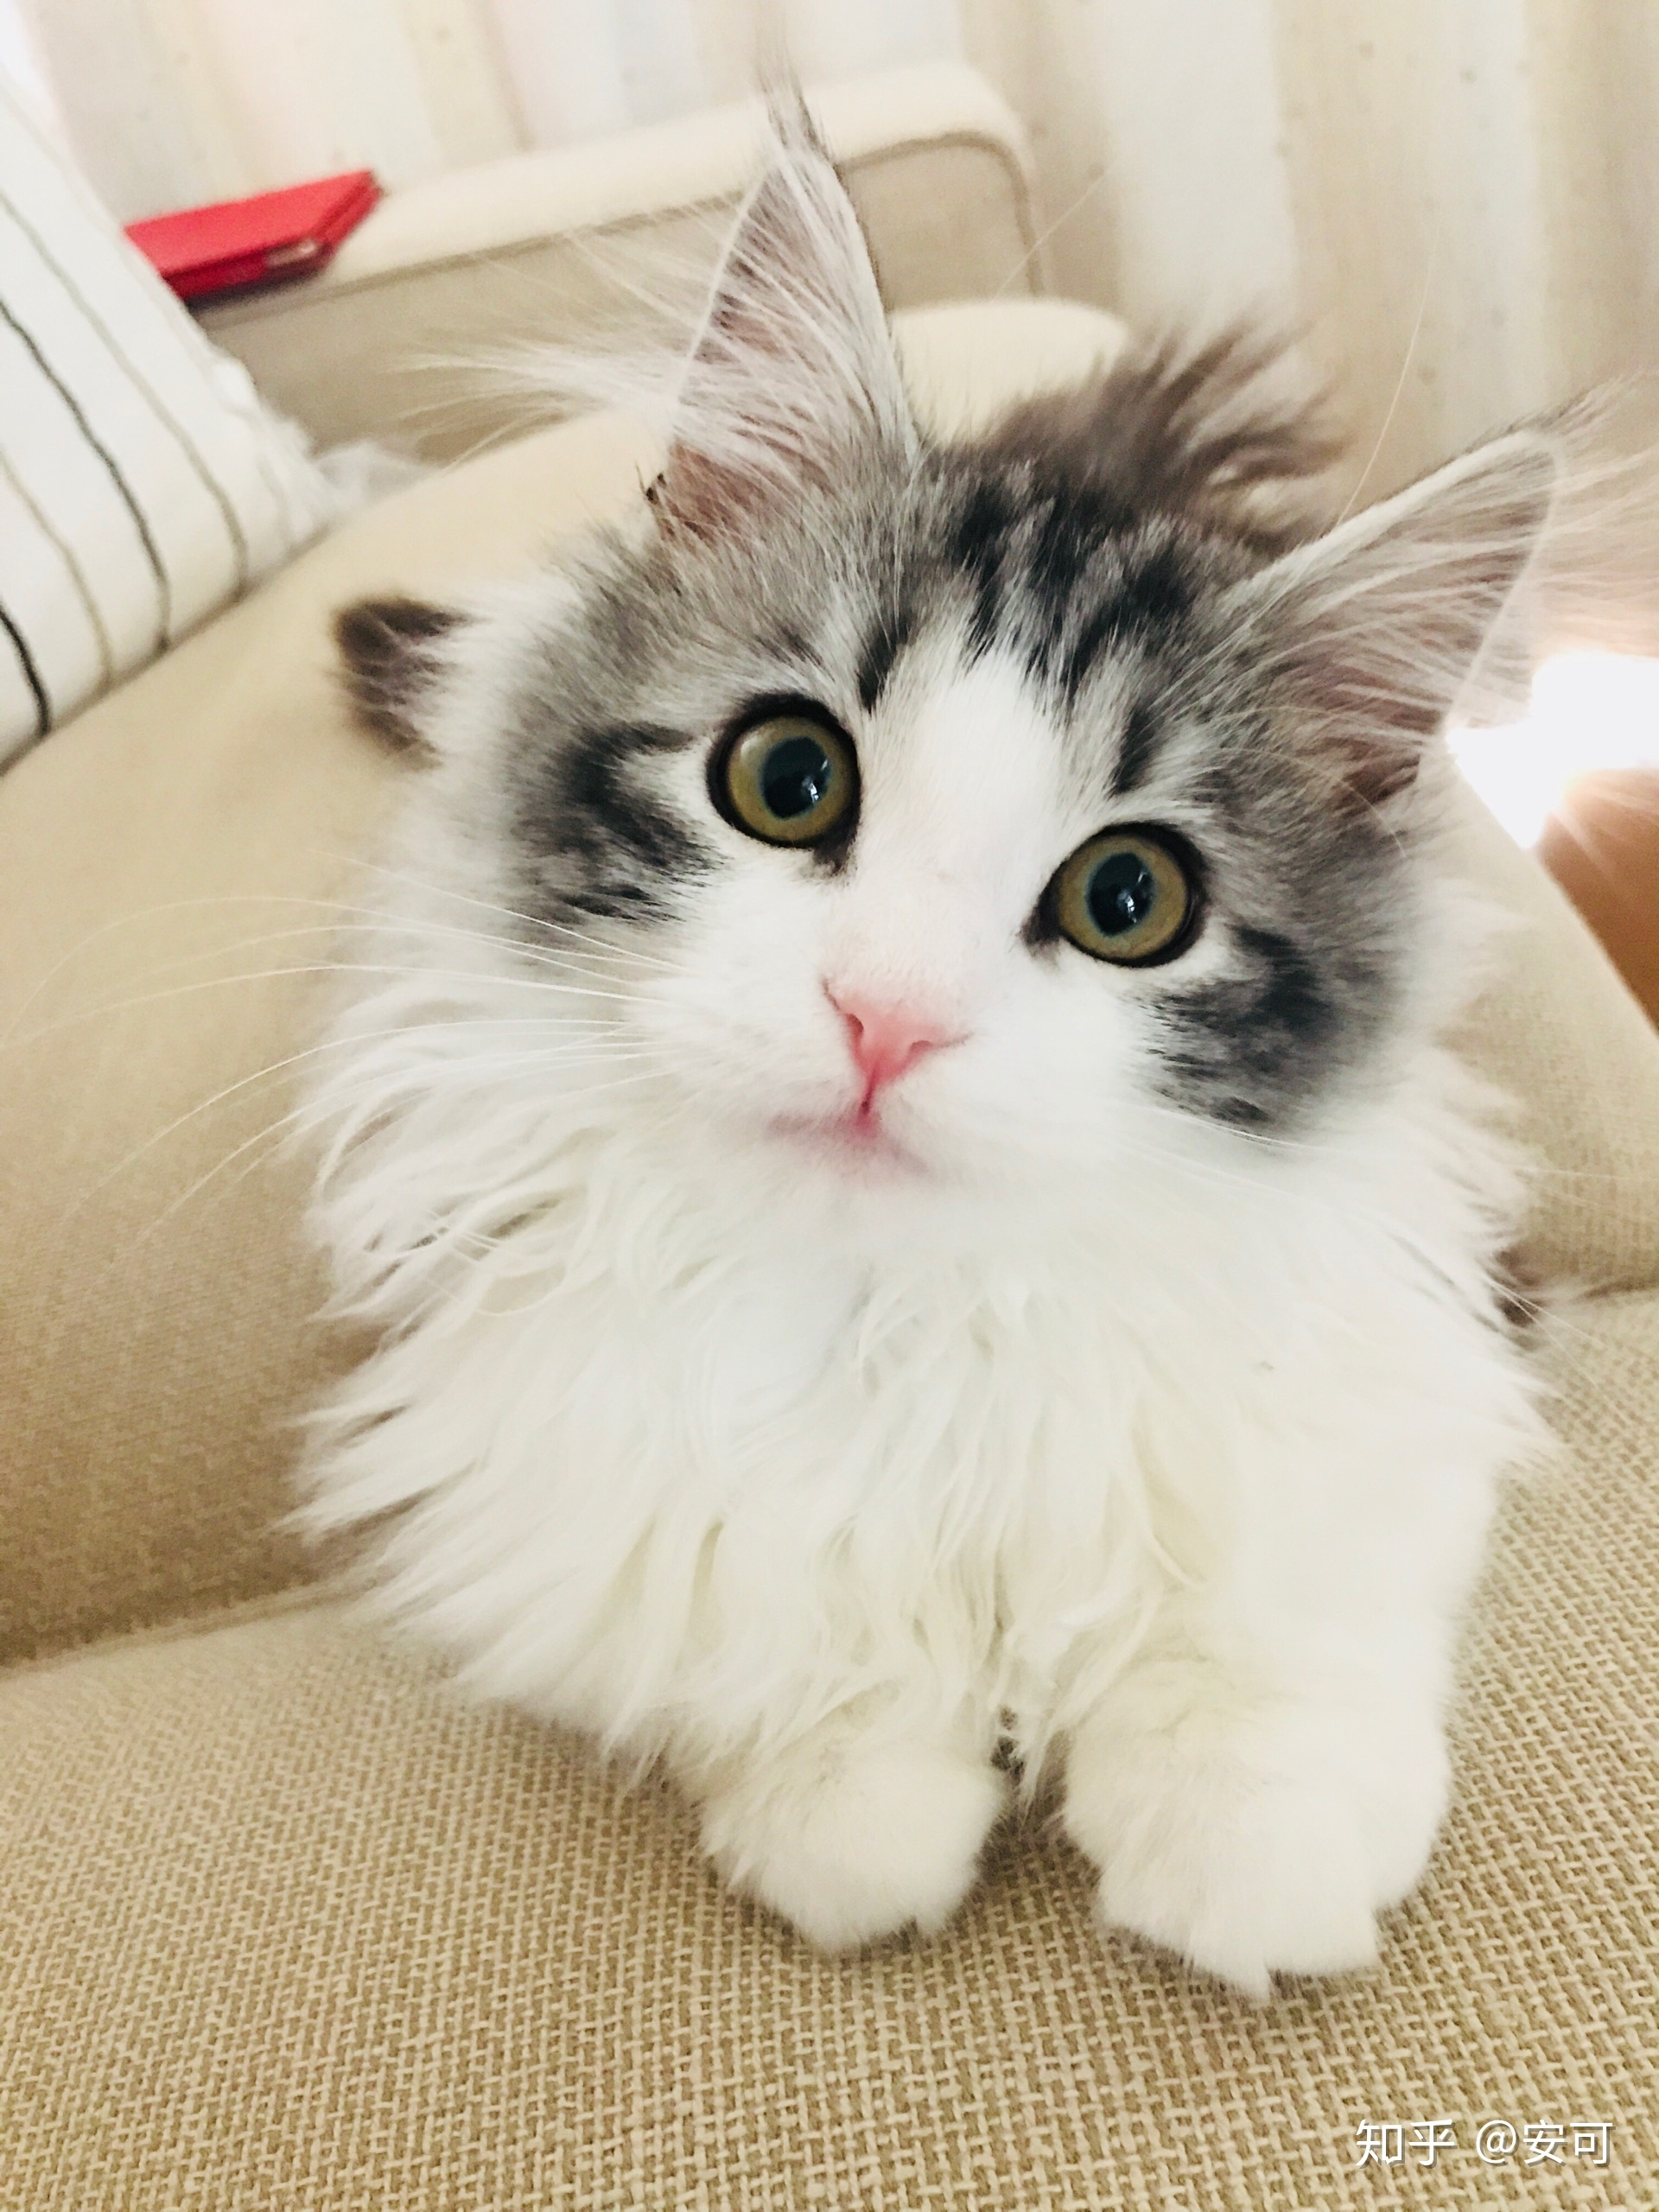

In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cat/000001.jpg"))

In [ ]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
y_train = []
y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:

            # angleに代入される値
            # -20
            # -15
            # -10
            #  -5
            # 0
            # 5
            # 10
            # 15
            # 画像を5度ずつ回転
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                # FLIP_LEFT_RIGHT　は 左右反転
                img_trains = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trains)
                X_train.append(data)
                y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()

    # Xは(1200, 64, 64, 3)
    # X.shape[1:]とすることで、(64, 64, 3)となり、入力にすることが可能です。
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # https://keras.io/ja/optimizers/
    # 今回は、最適化アルゴリズムにRMSpropを利用
    opt = RMSprop(lr=0.00005, decay=1e-6)
    # https://keras.io/ja/models/sequential/
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    # HDF5ファイルにKerasのモデルを保存
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Epoch 1/40
 1/46 [..............................] - ETA: 1:09 - loss: 0.7005 - accuracy: 0.5000

2021-03-16 11:57:37,590 - INFO - downloader - downloader-001 is waiting for new download tasks


12/46 [======>.......................] - ETA: 15s - loss: 0.6934 - accuracy: 0.5177

2021-03-16 11:57:42,595 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.6910 - accuracy: 0.5311

2021-03-16 11:57:47,600 - INFO - downloader - downloader-001 is waiting for new download tasks


33/46 [====================>.........] - ETA: 5s - loss: 0.6892 - accuracy: 0.5389

2021-03-16 11:57:52,603 - INFO - downloader - downloader-001 is waiting for new download tasks


45/46 [============================>.] - ETA: 0s - loss: 0.6863 - accuracy: 0.5484

2021-03-16 11:57:57,605 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 22s 453ms/step - loss: 0.6858 - accuracy: 0.5499
Epoch 2/40
10/46 [=====>........................] - ETA: 16s - loss: 0.6419 - accuracy: 0.7168

2021-03-16 11:58:02,606 - INFO - downloader - downloader-001 is waiting for new download tasks


21/46 [============>.................] - ETA: 11s - loss: 0.6396 - accuracy: 0.6876

2021-03-16 11:58:07,610 - INFO - downloader - downloader-001 is waiting for new download tasks


32/46 [===================>..........] - ETA: 6s - loss: 0.6375 - accuracy: 0.6807

2021-03-16 11:58:12,612 - INFO - downloader - downloader-001 is waiting for new download tasks


43/46 [===========================>..] - ETA: 1s - loss: 0.6350 - accuracy: 0.6791

2021-03-16 11:58:17,616 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 452ms/step - loss: 0.6341 - accuracy: 0.6788
Epoch 3/40
 8/46 [====>.........................] - ETA: 17s - loss: 0.6538 - accuracy: 0.6005

2021-03-16 11:58:22,618 - INFO - downloader - downloader-001 is waiting for new download tasks


19/46 [===========>..................] - ETA: 12s - loss: 0.6205 - accuracy: 0.6571

2021-03-16 11:58:27,619 - INFO - downloader - downloader-001 is waiting for new download tasks


30/46 [==================>...........] - ETA: 7s - loss: 0.6073 - accuracy: 0.6769

2021-03-16 11:58:32,622 - INFO - downloader - downloader-001 is waiting for new download tasks


41/46 [=========================>....] - ETA: 2s - loss: 0.5990 - accuracy: 0.6877

2021-03-16 11:58:37,624 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 449ms/step - loss: 0.5951 - accuracy: 0.6919
Epoch 4/40
 7/46 [===>..........................] - ETA: 16s - loss: 0.5514 - accuracy: 0.7215

2021-03-16 11:58:42,627 - INFO - downloader - downloader-001 is waiting for new download tasks


18/46 [==========>...................] - ETA: 12s - loss: 0.5398 - accuracy: 0.7391

2021-03-16 11:58:47,628 - INFO - downloader - downloader-001 is waiting for new download tasks


29/46 [=================>............] - ETA: 7s - loss: 0.5375 - accuracy: 0.7386

2021-03-16 11:58:52,631 - INFO - downloader - downloader-001 is waiting for new download tasks


40/46 [=========================>....] - ETA: 2s - loss: 0.5376 - accuracy: 0.7400

2021-03-16 11:58:57,635 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 450ms/step - loss: 0.5363 - accuracy: 0.7413
Epoch 5/40
 5/46 [==>...........................] - ETA: 18s - loss: 0.5032 - accuracy: 0.7651

2021-03-16 11:59:02,637 - INFO - downloader - downloader-001 is waiting for new download tasks


16/46 [=========>....................] - ETA: 13s - loss: 0.5171 - accuracy: 0.7504

2021-03-16 11:59:07,640 - INFO - downloader - downloader-001 is waiting for new download tasks


27/46 [================>.............] - ETA: 8s - loss: 0.5156 - accuracy: 0.7506

2021-03-16 11:59:12,642 - INFO - downloader - downloader-001 is waiting for new download tasks


38/46 [=======================>......] - ETA: 3s - loss: 0.5139 - accuracy: 0.7517

2021-03-16 11:59:17,646 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 450ms/step - loss: 0.5120 - accuracy: 0.7535
Epoch 6/40
 3/46 [>.............................] - ETA: 18s - loss: 0.4820 - accuracy: 0.7976

2021-03-16 11:59:22,647 - INFO - downloader - downloader-001 is waiting for new download tasks


14/46 [========>.....................] - ETA: 14s - loss: 0.4762 - accuracy: 0.7844

2021-03-16 11:59:27,649 - INFO - downloader - downloader-001 is waiting for new download tasks


25/46 [===============>..............] - ETA: 9s - loss: 0.4719 - accuracy: 0.7870 

2021-03-16 11:59:32,650 - INFO - downloader - downloader-001 is waiting for new download tasks


36/46 [======================>.......] - ETA: 4s - loss: 0.4711 - accuracy: 0.7876

2021-03-16 11:59:37,652 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 452ms/step - loss: 0.4693 - accuracy: 0.7895
Epoch 7/40
 2/46 [>.............................] - ETA: 18s - loss: 0.3223 - accuracy: 0.8839

2021-03-16 11:59:42,654 - INFO - downloader - downloader-001 is waiting for new download tasks


13/46 [=======>......................] - ETA: 14s - loss: 0.3994 - accuracy: 0.8360

2021-03-16 11:59:47,655 - INFO - downloader - downloader-001 is waiting for new download tasks


25/46 [===============>..............] - ETA: 9s - loss: 0.4116 - accuracy: 0.8314

2021-03-16 11:59:52,658 - INFO - downloader - downloader-001 is waiting for new download tasks


36/46 [======================>.......] - ETA: 4s - loss: 0.4180 - accuracy: 0.8290

2021-03-16 11:59:57,660 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 443ms/step - loss: 0.4217 - accuracy: 0.8276
Epoch 8/40
 1/46 [..............................] - ETA: 19s - loss: 0.4774 - accuracy: 0.7500

2021-03-16 12:00:02,661 - INFO - downloader - downloader-001 is waiting for new download tasks


13/46 [=======>......................] - ETA: 13s - loss: 0.4529 - accuracy: 0.7876

2021-03-16 12:00:07,663 - INFO - downloader - downloader-001 is waiting for new download tasks


24/46 [==============>...............] - ETA: 9s - loss: 0.4324 - accuracy: 0.8055 

2021-03-16 12:00:12,666 - INFO - downloader - downloader-001 is waiting for new download tasks


35/46 [=====================>........] - ETA: 4s - loss: 0.4249 - accuracy: 0.8132

2021-03-16 12:00:17,670 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 439ms/step - loss: 0.4172 - accuracy: 0.8200
Epoch 9/40


2021-03-16 12:00:22,672 - INFO - downloader - downloader-001 is waiting for new download tasks


12/46 [======>.......................] - ETA: 15s - loss: 0.4000 - accuracy: 0.7999

2021-03-16 12:00:27,676 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.3917 - accuracy: 0.8186

2021-03-16 12:00:32,678 - INFO - downloader - downloader-001 is waiting for new download tasks


33/46 [====================>.........] - ETA: 5s - loss: 0.3856 - accuracy: 0.8276

2021-03-16 12:00:37,682 - INFO - downloader - downloader-001 is waiting for new download tasks


45/46 [============================>.] - ETA: 0s - loss: 0.3779 - accuracy: 0.8370

2021-03-16 12:00:42,683 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 451ms/step - loss: 0.3769 - accuracy: 0.8381
Epoch 10/40
10/46 [=====>........................] - ETA: 16s - loss: 0.3663 - accuracy: 0.7800

2021-03-16 12:00:47,684 - INFO - downloader - downloader-001 is waiting for new download tasks


21/46 [============>.................] - ETA: 11s - loss: 0.3597 - accuracy: 0.7980

2021-03-16 12:00:52,686 - INFO - downloader - downloader-001 is waiting for new download tasks


32/46 [===================>..........] - ETA: 6s - loss: 0.3537 - accuracy: 0.8106

2021-03-16 12:00:57,691 - INFO - downloader - downloader-001 is waiting for new download tasks


44/46 [===========================>..] - ETA: 0s - loss: 0.3495 - accuracy: 0.8194

2021-03-16 12:01:02,692 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 444ms/step - loss: 0.3482 - accuracy: 0.8215
Epoch 11/40
 9/46 [====>.........................] - ETA: 16s - loss: 0.2801 - accuracy: 0.8990

2021-03-16 12:01:07,694 - INFO - downloader - downloader-001 is waiting for new download tasks


20/46 [============>.................] - ETA: 11s - loss: 0.2954 - accuracy: 0.8879

2021-03-16 12:01:12,697 - INFO - downloader - downloader-001 is waiting for new download tasks


31/46 [===================>..........] - ETA: 6s - loss: 0.2955 - accuracy: 0.8908

2021-03-16 12:01:17,699 - INFO - downloader - downloader-001 is waiting for new download tasks


42/46 [==========================>...] - ETA: 1s - loss: 0.2926 - accuracy: 0.8938

2021-03-16 12:01:22,701 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 450ms/step - loss: 0.2920 - accuracy: 0.8942
Epoch 12/40
 7/46 [===>..........................] - ETA: 17s - loss: 0.2828 - accuracy: 0.8654

2021-03-16 12:01:27,702 - INFO - downloader - downloader-001 is waiting for new download tasks


19/46 [===========>..................] - ETA: 12s - loss: 0.2844 - accuracy: 0.8723

2021-03-16 12:01:32,706 - INFO - downloader - downloader-001 is waiting for new download tasks


30/46 [==================>...........] - ETA: 7s - loss: 0.2832 - accuracy: 0.8753

2021-03-16 12:01:37,708 - INFO - downloader - downloader-001 is waiting for new download tasks


41/46 [=========================>....] - ETA: 2s - loss: 0.2804 - accuracy: 0.8783

2021-03-16 12:01:42,710 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 447ms/step - loss: 0.2780 - accuracy: 0.8805
Epoch 13/40
 6/46 [==>...........................] - ETA: 17s - loss: 0.2748 - accuracy: 0.9051

2021-03-16 12:01:47,711 - INFO - downloader - downloader-001 is waiting for new download tasks


17/46 [==========>...................] - ETA: 12s - loss: 0.2775 - accuracy: 0.8985

2021-03-16 12:01:52,713 - INFO - downloader - downloader-001 is waiting for new download tasks


29/46 [=================>............] - ETA: 7s - loss: 0.2708 - accuracy: 0.8984

2021-03-16 12:01:57,714 - INFO - downloader - downloader-001 is waiting for new download tasks


40/46 [=========================>....] - ETA: 2s - loss: 0.2655 - accuracy: 0.8997

2021-03-16 12:02:02,715 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 439ms/step - loss: 0.2628 - accuracy: 0.9008
Epoch 14/40
 5/46 [==>...........................] - ETA: 19s - loss: 0.2499 - accuracy: 0.9244

2021-03-16 12:02:07,720 - INFO - downloader - downloader-001 is waiting for new download tasks


16/46 [=========>....................] - ETA: 14s - loss: 0.2268 - accuracy: 0.9203

2021-03-16 12:02:12,724 - INFO - downloader - downloader-001 is waiting for new download tasks


27/46 [================>.............] - ETA: 8s - loss: 0.2266 - accuracy: 0.9164

2021-03-16 12:02:17,729 - INFO - downloader - downloader-001 is waiting for new download tasks


38/46 [=======================>......] - ETA: 3s - loss: 0.2270 - accuracy: 0.9152

2021-03-16 12:02:22,730 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 452ms/step - loss: 0.2271 - accuracy: 0.9144
Epoch 15/40
 4/46 [=>............................] - ETA: 17s - loss: 0.1676 - accuracy: 0.9479

2021-03-16 12:02:27,731 - INFO - downloader - downloader-001 is waiting for new download tasks


15/46 [========>.....................] - ETA: 14s - loss: 0.1770 - accuracy: 0.9480

2021-03-16 12:02:32,735 - INFO - downloader - downloader-001 is waiting for new download tasks


26/46 [===============>..............] - ETA: 9s - loss: 0.1840 - accuracy: 0.9433

2021-03-16 12:02:37,736 - INFO - downloader - downloader-001 is waiting for new download tasks


37/46 [=======================>......] - ETA: 4s - loss: 0.1881 - accuracy: 0.9401

2021-03-16 12:02:42,737 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 455ms/step - loss: 0.1905 - accuracy: 0.9381
Epoch 16/40
 2/46 [>.............................] - ETA: 20s - loss: 0.1818 - accuracy: 0.9375

2021-03-16 12:02:47,739 - INFO - downloader - downloader-001 is waiting for new download tasks


13/46 [=======>......................] - ETA: 15s - loss: 0.1784 - accuracy: 0.9508

2021-03-16 12:02:52,741 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.1771 - accuracy: 0.9491

2021-03-16 12:02:57,743 - INFO - downloader - downloader-001 is waiting for new download tasks


35/46 [=====================>........] - ETA: 5s - loss: 0.1749 - accuracy: 0.9486

2021-03-16 12:03:02,745 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 449ms/step - loss: 0.1775 - accuracy: 0.9460
Epoch 17/40


2021-03-16 12:03:07,746 - INFO - downloader - downloader-001 is waiting for new download tasks


11/46 [======>.......................] - ETA: 15s - loss: 0.1953 - accuracy: 0.9161

2021-03-16 12:03:12,748 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.1778 - accuracy: 0.9322

2021-03-16 12:03:17,749 - INFO - downloader - downloader-001 is waiting for new download tasks


34/46 [=====================>........] - ETA: 5s - loss: 0.1728 - accuracy: 0.9387

2021-03-16 12:03:22,751 - INFO - downloader - downloader-001 is waiting for new download tasks


45/46 [============================>.] - ETA: 0s - loss: 0.1710 - accuracy: 0.9424

2021-03-16 12:03:27,754 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 447ms/step - loss: 0.1706 - accuracy: 0.9429
Epoch 18/40
10/46 [=====>........................] - ETA: 16s - loss: 0.1431 - accuracy: 0.9512

2021-03-16 12:03:32,755 - INFO - downloader - downloader-001 is waiting for new download tasks


21/46 [============>.................] - ETA: 11s - loss: 0.1558 - accuracy: 0.9422

2021-03-16 12:03:37,758 - INFO - downloader - downloader-001 is waiting for new download tasks


32/46 [===================>..........] - ETA: 6s - loss: 0.1565 - accuracy: 0.9410

2021-03-16 12:03:42,760 - INFO - downloader - downloader-001 is waiting for new download tasks


44/46 [===========================>..] - ETA: 0s - loss: 0.1555 - accuracy: 0.9411

2021-03-16 12:03:47,761 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 445ms/step - loss: 0.1553 - accuracy: 0.9413
Epoch 19/40
 9/46 [====>.........................] - ETA: 15s - loss: 0.1175 - accuracy: 0.9732

2021-03-16 12:03:52,765 - INFO - downloader - downloader-001 is waiting for new download tasks


21/46 [============>.................] - ETA: 11s - loss: 0.1379 - accuracy: 0.9560

2021-03-16 12:03:57,769 - INFO - downloader - downloader-001 is waiting for new download tasks


31/46 [===================>..........] - ETA: 6s - loss: 0.1391 - accuracy: 0.9537

2021-03-16 12:04:02,772 - INFO - downloader - downloader-001 is waiting for new download tasks


42/46 [==========================>...] - ETA: 1s - loss: 0.1418 - accuracy: 0.9507

2021-03-16 12:04:07,776 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 452ms/step - loss: 0.1424 - accuracy: 0.9502
Epoch 20/40
 7/46 [===>..........................] - ETA: 16s - loss: 0.1153 - accuracy: 0.9731

2021-03-16 12:04:12,778 - INFO - downloader - downloader-001 is waiting for new download tasks


19/46 [===========>..................] - ETA: 11s - loss: 0.1141 - accuracy: 0.9705

2021-03-16 12:04:17,779 - INFO - downloader - downloader-001 is waiting for new download tasks


29/46 [=================>............] - ETA: 7s - loss: 0.1164 - accuracy: 0.9679

2021-03-16 12:04:22,781 - INFO - downloader - downloader-001 is waiting for new download tasks


40/46 [=========================>....] - ETA: 2s - loss: 0.1162 - accuracy: 0.9669

2021-03-16 12:04:27,783 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 453ms/step - loss: 0.1163 - accuracy: 0.9663
Epoch 21/40
 5/46 [==>...........................] - ETA: 18s - loss: 0.1044 - accuracy: 0.9751

2021-03-16 12:04:32,785 - INFO - downloader - downloader-001 is waiting for new download tasks


16/46 [=========>....................] - ETA: 13s - loss: 0.1122 - accuracy: 0.9665

2021-03-16 12:04:37,790 - INFO - downloader - downloader-001 is waiting for new download tasks


27/46 [================>.............] - ETA: 8s - loss: 0.1082 - accuracy: 0.9689

2021-03-16 12:04:42,791 - INFO - downloader - downloader-001 is waiting for new download tasks


37/46 [=======================>......] - ETA: 4s - loss: 0.1093 - accuracy: 0.9688

2021-03-16 12:04:47,793 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 463ms/step - loss: 0.1097 - accuracy: 0.9689
Epoch 22/40
 3/46 [>.............................] - ETA: 17s - loss: 0.0968 - accuracy: 0.9901

2021-03-16 12:04:52,794 - INFO - downloader - downloader-001 is waiting for new download tasks


14/46 [========>.....................] - ETA: 14s - loss: 0.1006 - accuracy: 0.9783

2021-03-16 12:04:57,799 - INFO - downloader - downloader-001 is waiting for new download tasks


25/46 [===============>..............] - ETA: 9s - loss: 0.1022 - accuracy: 0.9768 

2021-03-16 12:05:02,800 - INFO - downloader - downloader-001 is waiting for new download tasks


36/46 [======================>.......] - ETA: 4s - loss: 0.1043 - accuracy: 0.9745

2021-03-16 12:05:07,801 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 448ms/step - loss: 0.1037 - accuracy: 0.9745
Epoch 23/40
 1/46 [..............................] - ETA: 21s - loss: 0.1970 - accuracy: 0.9286

2021-03-16 12:05:12,806 - INFO - downloader - downloader-001 is waiting for new download tasks


12/46 [======>.......................] - ETA: 15s - loss: 0.1045 - accuracy: 0.9724

2021-03-16 12:05:17,810 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.0897 - accuracy: 0.9786

2021-03-16 12:05:22,814 - INFO - downloader - downloader-001 is waiting for new download tasks


34/46 [=====================>........] - ETA: 5s - loss: 0.0871 - accuracy: 0.9788

2021-03-16 12:05:27,816 - INFO - downloader - downloader-001 is waiting for new download tasks


45/46 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9791

2021-03-16 12:05:32,817 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 454ms/step - loss: 0.0860 - accuracy: 0.9792
Epoch 24/40
10/46 [=====>........................] - ETA: 16s - loss: 0.0682 - accuracy: 0.9912

2021-03-16 12:05:37,819 - INFO - downloader - downloader-001 is waiting for new download tasks


22/46 [=============>................] - ETA: 10s - loss: 0.0757 - accuracy: 0.9874

2021-03-16 12:05:42,823 - INFO - downloader - downloader-001 is waiting for new download tasks


33/46 [====================>.........] - ETA: 5s - loss: 0.0781 - accuracy: 0.9858

2021-03-16 12:05:47,826 - INFO - downloader - downloader-001 is waiting for new download tasks


43/46 [===========================>..] - ETA: 1s - loss: 0.0790 - accuracy: 0.9852

2021-03-16 12:05:52,827 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 454ms/step - loss: 0.0790 - accuracy: 0.9850
Epoch 25/40
 8/46 [====>.........................] - ETA: 17s - loss: 0.0729 - accuracy: 0.9816

2021-03-16 12:05:57,831 - INFO - downloader - downloader-001 is waiting for new download tasks


19/46 [===========>..................] - ETA: 12s - loss: 0.0697 - accuracy: 0.9831

2021-03-16 12:06:02,832 - INFO - downloader - downloader-001 is waiting for new download tasks


30/46 [==================>...........] - ETA: 7s - loss: 0.0688 - accuracy: 0.9827

2021-03-16 12:06:07,834 - INFO - downloader - downloader-001 is waiting for new download tasks


41/46 [=========================>....] - ETA: 2s - loss: 0.0687 - accuracy: 0.9824

2021-03-16 12:06:12,836 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 460ms/step - loss: 0.0685 - accuracy: 0.9823
Epoch 26/40
 6/46 [==>...........................] - ETA: 18s - loss: 0.0665 - accuracy: 0.9794

2021-03-16 12:06:17,837 - INFO - downloader - downloader-001 is waiting for new download tasks


16/46 [=========>....................] - ETA: 14s - loss: 0.0654 - accuracy: 0.9799

2021-03-16 12:06:22,839 - INFO - downloader - downloader-001 is waiting for new download tasks


28/46 [=================>............] - ETA: 8s - loss: 0.0657 - accuracy: 0.9808

2021-03-16 12:06:27,842 - INFO - downloader - downloader-001 is waiting for new download tasks


39/46 [========================>.....] - ETA: 3s - loss: 0.0666 - accuracy: 0.9804

2021-03-16 12:06:32,846 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 446ms/step - loss: 0.0663 - accuracy: 0.9807
Epoch 27/40
 5/46 [==>...........................] - ETA: 18s - loss: 0.0397 - accuracy: 0.9986

2021-03-16 12:06:37,849 - INFO - downloader - downloader-001 is waiting for new download tasks


15/46 [========>.....................] - ETA: 14s - loss: 0.0401 - accuracy: 0.9929

2021-03-16 12:06:42,851 - INFO - downloader - downloader-001 is waiting for new download tasks


26/46 [===============>..............] - ETA: 9s - loss: 0.0466 - accuracy: 0.9888

2021-03-16 12:06:47,854 - INFO - downloader - downloader-001 is waiting for new download tasks


37/46 [=======================>......] - ETA: 4s - loss: 0.0475 - accuracy: 0.9877

2021-03-16 12:06:52,856 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 460ms/step - loss: 0.0488 - accuracy: 0.9869
Epoch 28/40
 2/46 [>.............................] - ETA: 20s - loss: 0.1084 - accuracy: 0.9732

2021-03-16 12:06:57,857 - INFO - downloader - downloader-001 is waiting for new download tasks


13/46 [=======>......................] - ETA: 14s - loss: 0.0566 - accuracy: 0.9913

2021-03-16 12:07:02,859 - INFO - downloader - downloader-001 is waiting for new download tasks


24/46 [==============>...............] - ETA: 9s - loss: 0.0486 - accuracy: 0.9929 

2021-03-16 12:07:07,860 - INFO - downloader - downloader-001 is waiting for new download tasks


35/46 [=====================>........] - ETA: 4s - loss: 0.0496 - accuracy: 0.9917

2021-03-16 12:07:12,863 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 450ms/step - loss: 0.0497 - accuracy: 0.9910
Epoch 29/40


2021-03-16 12:07:17,864 - INFO - downloader - downloader-001 is waiting for new download tasks


11/46 [======>.......................] - ETA: 16s - loss: 0.0338 - accuracy: 1.0000

2021-03-16 12:07:22,866 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.0332 - accuracy: 0.9994

2021-03-16 12:07:27,868 - INFO - downloader - downloader-001 is waiting for new download tasks


35/46 [=====================>........] - ETA: 4s - loss: 0.0325 - accuracy: 0.9984

2021-03-16 12:07:32,870 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 440ms/step - loss: 0.0334 - accuracy: 0.9970


2021-03-16 12:07:37,871 - INFO - downloader - downloader-001 is waiting for new download tasks


Epoch 30/40
11/46 [======>.......................] - ETA: 15s - loss: 0.0318 - accuracy: 0.9898

2021-03-16 12:07:42,874 - INFO - downloader - downloader-001 is waiting for new download tasks


22/46 [=============>................] - ETA: 10s - loss: 0.0311 - accuracy: 0.9906

2021-03-16 12:07:47,876 - INFO - downloader - downloader-001 is waiting for new download tasks


33/46 [====================>.........] - ETA: 5s - loss: 0.0311 - accuracy: 0.9913

2021-03-16 12:07:52,879 - INFO - downloader - downloader-001 is waiting for new download tasks


44/46 [===========================>..] - ETA: 0s - loss: 0.0319 - accuracy: 0.9913

2021-03-16 12:07:57,881 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 454ms/step - loss: 0.0319 - accuracy: 0.9913
Epoch 31/40
 9/46 [====>.........................] - ETA: 15s - loss: 0.0202 - accuracy: 0.9981

2021-03-16 12:08:02,883 - INFO - downloader - downloader-001 is waiting for new download tasks


20/46 [============>.................] - ETA: 11s - loss: 0.0275 - accuracy: 0.9941

2021-03-16 12:08:07,885 - INFO - downloader - downloader-001 is waiting for new download tasks


31/46 [===================>..........] - ETA: 6s - loss: 0.0292 - accuracy: 0.9930

2021-03-16 12:08:12,886 - INFO - downloader - downloader-001 is waiting for new download tasks


42/46 [==========================>...] - ETA: 1s - loss: 0.0300 - accuracy: 0.9926

2021-03-16 12:08:17,889 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 451ms/step - loss: 0.0304 - accuracy: 0.9925
Epoch 32/40
 7/46 [===>..........................] - ETA: 17s - loss: 0.0187 - accuracy: 1.0000

2021-03-16 12:08:22,891 - INFO - downloader - downloader-001 is waiting for new download tasks


18/46 [==========>...................] - ETA: 12s - loss: 0.0184 - accuracy: 0.9998

2021-03-16 12:08:27,895 - INFO - downloader - downloader-001 is waiting for new download tasks


29/46 [=================>............] - ETA: 7s - loss: 0.0208 - accuracy: 0.9980

2021-03-16 12:08:32,896 - INFO - downloader - downloader-001 is waiting for new download tasks


40/46 [=========================>....] - ETA: 2s - loss: 0.0222 - accuracy: 0.9971

2021-03-16 12:08:37,898 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 456ms/step - loss: 0.0227 - accuracy: 0.9967
Epoch 33/40
 5/46 [==>...........................] - ETA: 18s - loss: 0.0257 - accuracy: 0.9954

2021-03-16 12:08:42,899 - INFO - downloader - downloader-001 is waiting for new download tasks


17/46 [==========>...................] - ETA: 12s - loss: 0.0279 - accuracy: 0.9938

2021-03-16 12:08:47,901 - INFO - downloader - downloader-001 is waiting for new download tasks


28/46 [=================>............] - ETA: 7s - loss: 0.0260 - accuracy: 0.9944

2021-03-16 12:08:52,906 - INFO - downloader - downloader-001 is waiting for new download tasks


39/46 [========================>.....] - ETA: 3s - loss: 0.0247 - accuracy: 0.9946

2021-03-16 12:08:57,907 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 440ms/step - loss: 0.0244 - accuracy: 0.9945
Epoch 34/40
 4/46 [=>............................] - ETA: 19s - loss: 0.0338 - accuracy: 0.9814

2021-03-16 12:09:02,909 - INFO - downloader - downloader-001 is waiting for new download tasks


16/46 [=========>....................] - ETA: 13s - loss: 0.0243 - accuracy: 0.9922

2021-03-16 12:09:07,910 - INFO - downloader - downloader-001 is waiting for new download tasks


27/46 [================>.............] - ETA: 8s - loss: 0.0236 - accuracy: 0.9937

2021-03-16 12:09:12,912 - INFO - downloader - downloader-001 is waiting for new download tasks


38/46 [=======================>......] - ETA: 3s - loss: 0.0236 - accuracy: 0.9944

2021-03-16 12:09:17,916 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 451ms/step - loss: 0.0240 - accuracy: 0.9943
Epoch 35/40
 3/46 [>.............................] - ETA: 18s - loss: 0.0133 - accuracy: 1.0000

2021-03-16 12:09:22,917 - INFO - downloader - downloader-001 is waiting for new download tasks


15/46 [========>.....................] - ETA: 13s - loss: 0.0135 - accuracy: 1.0000

2021-03-16 12:09:27,920 - INFO - downloader - downloader-001 is waiting for new download tasks


25/46 [===============>..............] - ETA: 9s - loss: 0.0133 - accuracy: 1.0000

2021-03-16 12:09:32,922 - INFO - downloader - downloader-001 is waiting for new download tasks


36/46 [======================>.......] - ETA: 4s - loss: 0.0148 - accuracy: 0.9990

2021-03-16 12:09:37,926 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 449ms/step - loss: 0.0152 - accuracy: 0.9986
Epoch 36/40
 1/46 [..............................] - ETA: 21s - loss: 0.0051 - accuracy: 1.0000

2021-03-16 12:09:42,931 - INFO - downloader - downloader-001 is waiting for new download tasks


13/46 [=======>......................] - ETA: 14s - loss: 0.0257 - accuracy: 0.9894

2021-03-16 12:09:47,934 - INFO - downloader - downloader-001 is waiting for new download tasks


24/46 [==============>...............] - ETA: 9s - loss: 0.0300 - accuracy: 0.9889 

2021-03-16 12:09:52,938 - INFO - downloader - downloader-001 is waiting for new download tasks


35/46 [=====================>........] - ETA: 4s - loss: 0.0286 - accuracy: 0.9901

2021-03-16 12:09:57,943 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 20s 445ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 37/40
 1/46 [..............................] - ETA: 17s - loss: 0.0044 - accuracy: 1.0000

2021-03-16 12:10:02,948 - INFO - downloader - downloader-001 is waiting for new download tasks


12/46 [======>.......................] - ETA: 15s - loss: 0.0086 - accuracy: 0.9992

2021-03-16 12:10:07,949 - INFO - downloader - downloader-001 is waiting for new download tasks


23/46 [==============>...............] - ETA: 10s - loss: 0.0117 - accuracy: 0.9976

2021-03-16 12:10:12,951 - INFO - downloader - downloader-001 is waiting for new download tasks


34/46 [=====================>........] - ETA: 5s - loss: 0.0118 - accuracy: 0.9976

2021-03-16 12:10:17,952 - INFO - downloader - downloader-001 is waiting for new download tasks


45/46 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9975

2021-03-16 12:10:22,954 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 452ms/step - loss: 0.0127 - accuracy: 0.9974
Epoch 38/40
10/46 [=====>........................] - ETA: 16s - loss: 0.0076 - accuracy: 1.0000

2021-03-16 12:10:27,958 - INFO - downloader - downloader-001 is waiting for new download tasks


20/46 [============>.................] - ETA: 12s - loss: 0.0078 - accuracy: 1.0000

2021-03-16 12:10:32,959 - INFO - downloader - downloader-001 is waiting for new download tasks


32/46 [===================>..........] - ETA: 6s - loss: 0.0089 - accuracy: 0.9995

2021-03-16 12:10:37,961 - INFO - downloader - downloader-001 is waiting for new download tasks


43/46 [===========================>..] - ETA: 1s - loss: 0.0093 - accuracy: 0.9994

2021-03-16 12:10:42,962 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 449ms/step - loss: 0.0095 - accuracy: 0.9993
Epoch 39/40
 8/46 [====>.........................] - ETA: 17s - loss: 0.0095 - accuracy: 0.9981

2021-03-16 12:10:47,964 - INFO - downloader - downloader-001 is waiting for new download tasks


19/46 [===========>..................] - ETA: 12s - loss: 0.0129 - accuracy: 0.9972

2021-03-16 12:10:52,967 - INFO - downloader - downloader-001 is waiting for new download tasks


30/46 [==================>...........] - ETA: 7s - loss: 0.0146 - accuracy: 0.9963

2021-03-16 12:10:57,970 - INFO - downloader - downloader-001 is waiting for new download tasks


41/46 [=========================>....] - ETA: 2s - loss: 0.0146 - accuracy: 0.9962

2021-03-16 12:11:02,972 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 454ms/step - loss: 0.0145 - accuracy: 0.9963
Epoch 40/40
 6/46 [==>...........................] - ETA: 18s - loss: 0.0136 - accuracy: 0.9990

2021-03-16 12:11:07,975 - INFO - downloader - downloader-001 is waiting for new download tasks


17/46 [==========>...................] - ETA: 13s - loss: 0.0123 - accuracy: 0.9976

2021-03-16 12:11:12,980 - INFO - downloader - downloader-001 is waiting for new download tasks


28/46 [=================>............] - ETA: 8s - loss: 0.0120 - accuracy: 0.9974

2021-03-16 12:11:17,983 - INFO - downloader - downloader-001 is waiting for new download tasks


39/46 [========================>.....] - ETA: 3s - loss: 0.0127 - accuracy: 0.9967

2021-03-16 12:11:22,985 - INFO - downloader - downloader-001 is waiting for new download tasks


46/46 [==============================] - 21s 460ms/step - loss: 0.0128 - accuracy: 0.9964


In [4]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)

3

from google.colab import files
uploaded = files.upload()


testpic     = "./dog1.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))
print(prd) # 精度の表示
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 犬")
elif prelabel == 1:
    print(">>> 猫")

Saving ダウンロード (2).jpg to ダウンロード (2).jpg


OSError: ignored